# Linear Regression


> _"Baseball statistics are like a girl in a bikini. They show a lot, but not everything."_   
    
> [- Toby Harrah, former MLB baseball player](http://www.baseball-reference.com/players/h/harrato01.shtml)

---

## Overview

In this notebook, I demonstrate usage of both univariate and multivariate linear regression (in Python) as a means for predicting specific outcomes -- in this case, the number of wins Major League Baseball (MLB) teams attain over the course of a 162-game season. 

![Ken Griffey: The Ultimate 5-Tool Player](img/kengriffey.png "Logo Title Text 1")

note to self: use html/css to size junior

---

## Context

Love it or hate it, baseball has been a game of numbers since the MLB's inaugural season in 1869. Over the ~150 years since then, MLB general managers and statisticians have developed a vast assortment of metrics in an attempt to better to build baseball team rosters that have  better chances at succeeding.

### Historical baseball analysis: Five tools

Historically, baseball talent scouts have relied on the <a href="https://en.wikipedia.org/wiki/Glossary_of_baseball_(0%E2%80%939)#5-tool_player" target="_blank">__ _5 tools_ __</a> that positional baseball players (i.e., non-pitchers) are said to possess as a measure of a player's ability. Those five tools include:   
- batting for average   
- batting for power  
- speed  
- defense with glove  
- defense with arm  

The higher a player ranks on each of these five tools, the more valuable you would expect that player to be to his team. The five tools are typically only applied to positional players, and are not commonly used to evaluate pitchers.

### Current baseball analysis: WAR

With recent advances in statistical techniques and the availability of robust baseball datasets (such as the [Lahman database](http://www.seanlahman.com/baseball-archive/statistics/)), statisticians have developed several metrics, or <a href="http://sabr.org/sabermetrics" target="_blank">"_sabermetrics_,"</a> to better quantify the game of baseball. __Wins above replacement__ (WAR) and is one of the most popular sabermetrics. According to <a href="http://www.espn.com/blog/sweetspot/post/_/id/27050/what-we-talk-about-when-we-talk-about-war" target="_blank">ESPN:</a>

> It [WAR] attempts to evaluate a player's total contribution -- batting, fielding, baserunning, pitching -- to his team. It is expressed in terms of wins over the perceived value of a replacement-level player at each position, essentially a Triple-A player. (A team of replacement-level players would be expected to win about 50 games.)



Simply put, WAR aims to quantify the value a player adds to his team in terms of wins per season. In other words, a team composed of players with high-WAR values should be expected to attain more wins in a season than a team composed of players with low-WAR values. 

WAR is calculated separately for positional players and pitchers; I focus on WAR for positional players in this notebook.


_Note: This notebook is intended to demonstrate principles of linear regression in a baseball setting; it is not intended as a rigorous analysis of the ideal predictors to use in constructing a successful baseball team :)_
 

---

## Method

Linear regression is a common technique used for predicting continuous variables. _Univariate_ linear regression refers to regression models with only one predictor variable, whereas _multivariate_ linear regression refers to regression models with several predictor variables. I will compare a univariate regression model with one predictor, WAR, to a multivariate regression model with several predictors to serve as proxies for the five tools.

Because the five tools are typically only applied to positional players (and not pitchers), I  purposefully excluded pitching WAR from my univariate

### Data

Data for this analysis were cleaned and prepared in another notebook; please see [this notebook](INSERT LINK TO NOTEBOOK) for more information on how the variables listed below were collected.

In the dataset, each row represents a single team over one season of play. There are 30 MLB teams represented in the dataset ranging 53 years from 1963 - 2015.  

##### Outcome variable

Possible outcomes to consider for this analysis include whether or not a team made the playoffs and whether or not a team wins the World Series (i.e., MLB championship), but these are both binary (e.g., Yes/No) variables that would be best suited for a logistic regression model. I used number of wins as my outcome variable, since this is a continuous variable suited for linear regression.

* __Wins__: _the number of wins a specific MLB team attained in a given season_  

##### Predictor variables  
_Univariate analysis_: 
* __WAR__: the cumulative offensive and defensive WAR attained by a single team in a given season (does not include pitching WAR) 

_Multivariate_:  
* __AVG__ (batting for average): the average number of hits a given team attained per at bat for a given season (e.g., a .300 AVG means a team averaged 3 hits for every 10 at bats)  
* __ISO__ (batting for power): isolated slugging percentage, calculated as   
* __Spd__ (speed): insert description here  
- __FG_Def__ (defense with glove, defense with arm): insert description here



<a href="https://en.wikipedia.org/wiki/Glossary_of_baseball_(0%E2%80%939)#5-tool_player" target="_blank">5 tool baseball player: wikipedia.com</a>

<a href="http://www.performancebaseball.net/html/5tools.html" target="_blank">5 tool baseball player: performancebaseball.net</a>

<a href="http://fivethirtyeight.com/features/the-toolsiest-player-of-them-all/" target="_blank">'Toolsiest player of them all': 538.com</a>

<a href="http://www.baseball-reference.com/about/war_explained.shtml" target="_blank">Baseball Reference WAR</a>

<a href="http://www.fangraphs.com/library/misc/war/" target="_blank">Fangraphs WAR</a>

<a href="https://en.wikipedia.org/wiki/Wins_Above_Replacement" target="_blank">Wikipedia WAR</a>

<a href="http://www.espn.com/blog/sweetspot/post/_/id/27050/what-we-talk-about-when-we-talk-about-war" target="_blank">ESPN WAR</a>

--- 

### Analysis & Code

In [34]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# view plots in notebook
%matplotlib inline

In [35]:
# import previously cleaned regression dataset
five = pd.read_csv('data/five_reg.csv')

In [38]:
five.columns

Index([u'Year', u'Team', u'AVG', u'ISO', u'WAR', u'Spd', u'Def', u'lgID', u'W',
       u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'playoffs'],
      dtype='object')

In [39]:
five.head()

,Year,Team,AVG,ISO,WAR,Spd,Def,lgID,W,L,DivWin,WCWin,LgWin,WSWin,playoffs
0,1996,Mariners,0.287,0.197,37.1,4.4,33.1,AL,85,76,N,N,N,N,False
1,1996,Indians,0.293,0.182,30.2,4.9,-35.0,AL,99,62,Y,N,N,N,True
2,1999,Indians,0.289,0.177,34.4,5.1,18.6,AL,97,65,Y,N,N,N,True
3,1995,Indians,0.291,0.188,27.8,4.8,-24.1,AL,100,44,Y,N,Y,N,True
4,1994,Yankees,0.290,0.172,23.4,3.9,-16.0,AL,70,43,NaN,NaN,NaN,NaN,False


In [37]:
five.describe()

,Year,AVG,ISO,WAR,Spd,Def,W,L
count,1417.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1417.000000,1417.000000
mean,1990.575159,0.258926,0.138025,18.716051,4.462145,12.399006,79.753705,79.651376
std,15.110101,0.013083,0.024240,8.267527,0.580856,46.514914,12.286282,12.242944
min,1963.000000,0.214000,0.073000,-9.700000,2.700000,-160.900000,37.000000,40.000000
25%,1978.000000,NaN,NaN,NaN,NaN,NaN,71.000000,71.000000
50%,1991.000000,NaN,NaN,NaN,NaN,NaN,80.000000,79.000000
75%,2004.000000,NaN,NaN,NaN,NaN,NaN,89.000000,88.000000
max,2015.000000,0.294000,0.206000,45.900000,6.600000,150.900000,116.000000,119.000000


In [8]:
preds = five[['AVG','ISO','Def','Spd']]
war = five['WAR']
wins = five['W']

In [9]:
preds.head()

,AVG,ISO,Def,Spd
0,0.283,0.194,-24.8,4.6
1,0.289,0.202,-61.5,4.8
2,0.290,0.174,-47.2,5.0
3,0.282,0.190,-66.6,4.4
4,0.285,0.177,-91.9,4.9


In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Multivariate: 5 tools
--- 

In [11]:
# set params for model, use 30% of data for test set
X_train, X_test, y_train, y_test = train_test_split(preds, wins, test_size=0.3, random_state=101)

In [12]:
# train model
lm = LinearRegression()
# lm.fit(X_train,y_train)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# predictions = lm.predict(X_test)
predictions = lm.predict(X_test)

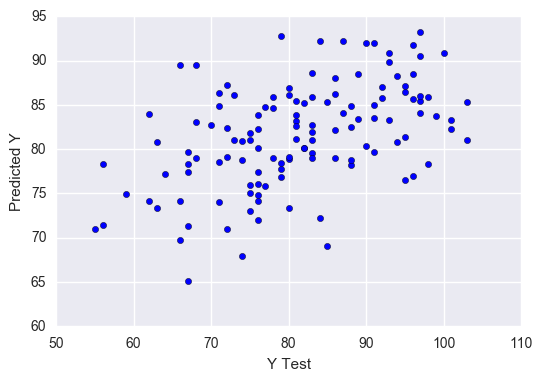

In [14]:
# view scatter plot of predictions vs. actual values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [15]:
# view model metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, predictions)))

('MAE:', 7.7752632534997881)
('MSE:', 95.991455660301767)
('RMSE:', 9.7975229349209361)
('R^2:', 0.49154804253058382)


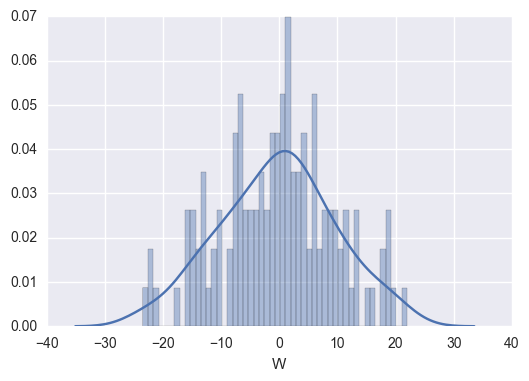

In [16]:
# plot residuals, should approximate normal distribution
sns.distplot((y_test-predictions),bins=50)

In [17]:
# view coefficients table
# interpretation of table: 1-unit increase in variable in column 1 corresponds with 
coefficients = pd.DataFrame(lm.coef_,preds.columns)
coefficients.columns = ['Coefficient']
coefficients.sort('Coefficient',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Coefficient
AVG,276.888137
ISO,178.408945
Def,0.077495
Spd,-0.915602


## Univariate: WAR
--- 

In [18]:
# set params for model, use 30% of data for test set
X_train, X_test, y_train, y_test = train_test_split(war, wins, test_size=0.3, random_state=101)

In [19]:
len(war) == len(wins)

True

In [20]:
# train model
lm = LinearRegression()
# lm.fit(X_train,y_train)
lm.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# predictions = lm.predict(X_test)
predictions = lm.predict(X_test.reshape(-1,1))

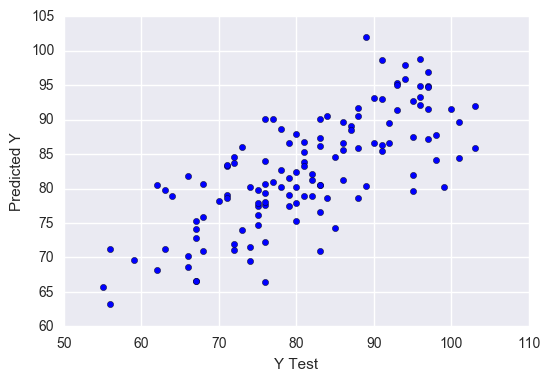

In [22]:
# view scatter plot of predictions vs. actual values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [23]:
# view model metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, predictions)))

('MAE:', 6.0043785485185959)
('MSE:', 58.797435099323721)
('RMSE:', 7.6679485587296243)
('R^2:', 0.73175873606160236)


In [58]:
# view coefficients table
# interpretation of table: 1-unit increase in variable in column 1 corresponds with 
coefficients = pd.DataFrame(lm.coef_,index=['war'])
coefficients.columns = ['Coefficient']
coefficients.sort('Coefficient',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Coefficient
war,1.11418
